## Análise Estatística Descritiva dos Dados de COVID-19

<div style="text-align: center; margin-bottom: 20px;">
  <img src="../03-Recursos/covid_image.png" style="width: 600px; display: block; margin-left: auto; margin-right: auto;"/>
</div>

## SUMÁRIO

[1. INTRODUÇÃO 🚀](#1-introducao) <br>

[2. OBJETIVO 🎯](#2-objetivo) <br>

[3. IMPORTAÇÃO DE BIBLIOTECAS 📚](#3-importacao-de-bibliotecas) <br>

[4. CARREGAMENTO E PRÉ-PROCESSAMENTO DOS DADOS 🔄](#4-carregamento-e-pre-processamento-dos-dados) <br>

[5. CLASSIFICAÇÃO DAS VARIÁVEIS 📊](#5-classificacao-das-variaveis) <br> 

[6. ANÁLISE ESTATÍSTICA DESCRITIVA 📈](#6-analise-estatistica-descritiva) <br>

[7. VISUALIZAÇÃO GRÁFICA 🔍](#7-visualizacao-grafica) <br> 

[8. ANÁLISE DE OUTLIERS 🔍](#8-analise-de-outliers) <br> 

[9. ANÁLISE DE CORRELAÇÃO 🔗](#9-analise-de-correlacao) <br> 

[10. ANÁLISE DE SÉRIES TEMPORAIS 🕒](#10-analise-de-series-temporais) <br>

[11. CONCLUSÃO 🏁](#11-conclusao) <br>

## 1. Introdução 🚀 <a id="1-introducao"></a>

A pandemia de COVID-19 impactou o mundo de maneiras sem precedentes, e o Brasil esteve entre os países com altos números de casos e óbitos. Desde o início da pandemia, a análise de dados tem sido uma ferramenta fundamental para entender a propagação do vírus e tomar decisões de saúde pública.

Este projeto faz parte do trabalho de conclusão do **módulo de Estatística I** do programa **Santander Coders 2024**. O objetivo é realizar uma **análise estatística descritiva** e uma **análise de séries temporais** dos dados da COVID-19 no Brasil, focando nos números de casos confirmados, óbitos e suas variações ao longo do tempo em nível estadual.

O dataset utilizado nesta análise está disponível no portal **Brasil.io**, que oferece dados públicos sobre a pandemia no Brasil: [Covid-19 Dataset - Brasil.io](https://brasil.io/dataset/covid19/caso_full/).

O trabalho está dividido em duas partes principais:
1. **Estatística Descritiva**: Exploramos as variáveis do dataset, analisando medidas como média, mediana, desvio padrão e identificação de outliers.
2. **Séries Temporais**: Investigamos o comportamento dos dados ao longo do tempo, destacando tendências e possíveis padrões sazonais.

Ferramentas como **Python**, **pandas**, **matplotlib**, e **seaborn** serão usadas para manipulação dos dados e criação de gráficos para visualização e análise.

O intuito desta análise é fornecer insights sobre o comportamento da pandemia em cada estado brasileiro, auxiliando na compreensão de como o vírus se propagou e impactou diferentes regiões do país.


## 2. Objetivo 🎯 <a id="2-objetivo"></a>

### Objetivo Geral:
O objetivo deste projeto é realizar uma análise estatística descritiva e de séries temporais dos dados de COVID-19 no Brasil, utilizando informações disponíveis no nível estadual. Esta análise visa identificar padrões, tendências e anomalias nos números de casos confirmados e mortes, oferecendo insights sobre o comportamento da pandemia nas diferentes regiões do país.

### Objetivos Específicos:
1. **Classificar e analisar as variáveis do dataset**:
   - Identificar variáveis quantitativas e qualitativas e realizar uma análise descritiva com base em medidas como média, mediana, desvio padrão, mínimo, máximo, e quartis.
   
2. **Identificar e tratar valores anômalos (outliers e valores negativos)**:
   - Analisar os dados em busca de outliers e valores negativos, principalmente nas variáveis de novos casos e novas mortes, justificando a decisão de manter ou remover esses valores.

3. **Visualizar graficamente os dados**:
   - Criar histogramas, boxplots e gráficos de dispersão para entender a distribuição dos dados e identificar padrões visuais importantes.

4. **Realizar uma análise de séries temporais**:
   - Examinar o comportamento das variáveis ao longo do tempo, destacando tendências, sazonalidade e variações importantes no número de casos e mortes em cada estado.

5. **Interpretar os resultados e fornecer conclusões baseadas nos insights obtidos**:
   - Apresentar os principais achados da análise, explicando como os dados se comportam ao longo do tempo e como esses insights podem auxiliar na compreensão da pandemia no Brasil.


## 3. Importação de Bibliotecas 📚 <a id="3-importacao-de-bibliotecas"></a>

Nesta seção, importamos as bibliotecas necessárias para a análise dos dados de COVID-19. Utilizaremos as seguintes ferramentas:

- **pandas**: Para manipulação e análise dos dados.
- **matplotlib**: Para visualização gráfica.
- **seaborn**: Para gráficos estatísticos mais sofisticados.
- **numpy**: Para operações matemáticas e de array.

Além disso, abaixo exibimos as versões das bibliotecas utilizadas para garantir a reprodutibilidade dos resultados.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from platform import python_version
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import normaltest

# Tabela de versões das bibliotecas e do Python
library_versions = {
    "Pandas": pd.__version__,
    "Matplotlib": matplotlib.__version__,
    "Seaborn": sns.__version__,
    "NumPy": np.__version__
}

# Exibindo as versões das bibliotecas
print("Versões das Bibliotecas:\n")
print(f"{'Biblioteca':<20} | {'Versão':>10}")
for nome, versao in library_versions.items():
    print(f"{nome:<20} | {versao:>10}")

# Versão do Python
print("\nVersão do Python:")
print(python_version())

Versões das Bibliotecas:

Biblioteca           |     Versão
Pandas               |      1.5.3
Matplotlib           |      3.7.1
Seaborn              |     0.12.2
NumPy                |     1.24.3

Versão do Python:
3.11.4


## 4. Carregamento e Pré-Processamento dos Dados 🔄 <a id="4-carregamento-e-pre-processamento-dos-dados"></a>

Nesta seção, faremos o carregamento do dataset de COVID-19, seguido de verificações e pré-manipulações necessárias para garantir que os dados estejam prontos para análise. O dataset é proveniente do portal [Brasil.io](https://brasil.io/dataset/covid19/caso_full/), contendo informações detalhadas sobre casos confirmados, óbitos e outros fatores relacionados à pandemia.

As etapas realizadas incluem:
1. Carregamento do dataset.
2. Exibição da estrutura inicial dos dados.
3. Descrição detalhada das colunas.
4. Verificação de valores ausentes e duplicados.
5. Tradução das colunas para o português.
6. Mudanças de tipos de dados
7. Ajustes e remoção de colunas irrelevantes para a análise.

O código correspondente está abaixo:

In [2]:
arquivo = "../01-Base-de-Dados/covid19-0f81afa72854491686b7f93cf598b6fa.csv"
df = pd.read_csv(arquivo)
df.head()

,epidemiological_week,date,order_for_place,state,city,city_ibge_code,place_type,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,new_confirmed,last_available_deaths,new_deaths,last_available_death_rate,estimated_population,is_last,is_repeated
0,202213,2022-03-27,741,AC,NaN,12,state,123808,13841.49273,31,1992,0,0.0161,894470,True,False
1,202213,2022-03-27,750,AL,NaN,27,state,295972,8830.91758,0,6869,0,0.0232,3351543,False,True
2,202213,2022-03-27,745,AM,NaN,13,state,581070,13809.63630,28,14151,0,0.0244,4207714,True,False
3,202213,2022-03-27,738,AP,NaN,16,state,160328,18604.43527,7,2122,0,0.0132,861773,True,False
4,202213,2022-03-27,752,BA,NaN,29,state,1530054,10247.74969,1046,29658,2,0.0194,14930634,True,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20119 entries, 0 to 20118
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   epidemiological_week                           20119 non-null  int64  
 1   date                                           20119 non-null  object 
 2   order_for_place                                20119 non-null  int64  
 3   state                                          20119 non-null  object 
 4   city                                           0 non-null      float64
 5   city_ibge_code                                 20119 non-null  int64  
 6   place_type                                     20119 non-null  object 
 7   last_available_confirmed                       20119 non-null  int64  
 8   last_available_confirmed_per_100k_inhabitants  20113 non-null  float64
 9   new_confirmed                                  201

In [4]:
# Criando um dicionário com as descrições básicas das colunas do dataset de COVID-19, sem especificar a utilidade
descricao_colunas = {
    "epidemiological_week": "Semana epidemiológica do registro.",
    "date": "Data do registro.",
    "order_for_place": "Número da ordem de registro para o estado.",
    "state": "Sigla do estado onde os dados foram registrados.",
    "city": "Nome da cidade.",
    "city_ibge_code": "Código IBGE da cidade.",
    "place_type": "Tipo do local (estado ou cidade).",
    "last_available_confirmed": "Número total de casos confirmados até a data.",
    "last_available_confirmed_per_100k_inhabitants": "Casos confirmados por 100 mil habitantes.",
    "new_confirmed": "Número de novos casos confirmados no dia.",
    "last_available_deaths": "Número total de mortes confirmadas até a data.",
    "new_deaths": "Número de novas mortes confirmadas no dia.",
    "last_available_death_rate": "Taxa de mortalidade.",
    "estimated_population": "População estimada do estado.",
    "is_last": "Indica se o registro é o mais recente (True/False).",
    "is_repeated": "Indica se o registro foi repetido (True/False)."
}

# Convertendo o dicionário em um DataFrame para facilitar a visualização e entendimento das colunas
df_descricao_colunas = pd.DataFrame(list(descricao_colunas.items()), columns=['Coluna', 'Descrição'])

# Exibindo o DataFrame para visualização das descrições básicas das colunas
df_descricao_colunas

,Coluna,Descrição
0,epidemiological_week,Semana epidemiológica do registro.
1,date,Data do registro.
2,order_for_place,Número da ordem de registro para o estado.
3,state,Sigla do estado onde os dados foram registrados.
4,city,Nome da cidade.
5,city_ibge_code,Código IBGE da cidade.
6,place_type,Tipo do local (estado ou cidade).
7,last_available_confirmed,Número total de casos confirmados até a data.
8,last_available_confirmed_per_100k_inhabitants,Casos confirmados por 100 mil habitantes.
9,new_confirmed,Número de novos casos confirmados no dia.


In [5]:
# Exibindo a soma de valores nulos para cada coluna no DataFrame
null_values = df.isnull().sum()

# Verificando se há valores nulos e exibindo os resultados
print("Quantidade de valores nulos por coluna no dataset:")
print(null_values)

Quantidade de valores nulos por coluna no dataset:
epidemiological_week                                 0
date                                                 0
order_for_place                                      0
state                                                0
city                                             20119
city_ibge_code                                       0
place_type                                           0
last_available_confirmed                             0
last_available_confirmed_per_100k_inhabitants        6
new_confirmed                                        0
last_available_deaths                                0
new_deaths                                           0
last_available_death_rate                            0
estimated_population                                 0
is_last                                              0
is_repeated                                          0
dtype: int64


In [6]:
# Contando o número de linhas duplicadas no DataFrame
num_duplicatas = df.duplicated().sum()

# Exibindo o número de linhas duplicadas
print(f"Total de linhas duplicadas: {num_duplicatas}")

Total de linhas duplicadas: 0


In [7]:
# Criando um dicionário para traduzir os nomes das colunas do dataset de COVID-19 para português no estilo snake_case
colunas_traduzidas = {
    "epidemiological_week": "semana_epidemiologica",
    "date": "data",
    "order_for_place": "ordem_registro_estado",
    "state": "estado",
    "city": "cidade",
    "city_ibge_code": "codigo_ibge_cidade",
    "place_type": "tipo_local",
    "last_available_confirmed": "total_casos_confirmados",
    "last_available_confirmed_per_100k_inhabitants": "casos_confirmados_por_100k_habitantes",
    "new_confirmed": "novos_casos_confirmados",
    "last_available_deaths": "total_mortes_confirmadas",
    "new_deaths": "novas_mortes_confirmadas",
    "last_available_death_rate": "taxa_mortalidade",
    "estimated_population": "populacao_estimada",
    "is_last": "registro_mais_recente",
    "is_repeated": "registro_repetido"
}

# Aplicando as novas nomenclaturas das colunas ao DataFrame
df.rename(columns=colunas_traduzidas, inplace=True)

# Exibindo as primeiras linhas do DataFrame para verificar as novas nomenclaturas de colunas
df.head()

,semana_epidemiologica,data,ordem_registro_estado,estado,cidade,codigo_ibge_cidade,tipo_local,total_casos_confirmados,casos_confirmados_por_100k_habitantes,novos_casos_confirmados,total_mortes_confirmadas,novas_mortes_confirmadas,taxa_mortalidade,populacao_estimada,registro_mais_recente,registro_repetido
0,202213,2022-03-27,741,AC,NaN,12,state,123808,13841.49273,31,1992,0,0.0161,894470,True,False
1,202213,2022-03-27,750,AL,NaN,27,state,295972,8830.91758,0,6869,0,0.0232,3351543,False,True
2,202213,2022-03-27,745,AM,NaN,13,state,581070,13809.63630,28,14151,0,0.0244,4207714,True,False
3,202213,2022-03-27,738,AP,NaN,16,state,160328,18604.43527,7,2122,0,0.0132,861773,True,False
4,202213,2022-03-27,752,BA,NaN,29,state,1530054,10247.74969,1046,29658,2,0.0194,14930634,True,False


In [8]:
# Atualizando o dicionário com as descrições em português para refletir os novos nomes de colunas

descricao_colunas_atualizada = {
    "semana_epidemiologica": "Semana epidemiológica do registro.",
    "data": "Data do registro.",
    "ordem_registro_estado": "Número da ordem de registro para o estado.",
    "estado": "Sigla do estado onde os dados foram registrados.",
    "cidade": "Nome da cidade.",
    "codigo_ibge_cidade": "Código IBGE da cidade.",
    "tipo_local": "Tipo do local (estado ou cidade).",
    "total_casos_confirmados": "Número total de casos confirmados até a data.",
    "casos_confirmados_por_100k_habitantes": "Casos confirmados por 100 mil habitantes.",
    "novos_casos_confirmados": "Número de novos casos confirmados no dia.",
    "total_mortes_confirmadas": "Número total de mortes confirmadas até a data.",
    "novas_mortes_confirmadas": "Número de novas mortes confirmadas no dia.",
    "taxa_mortalidade": "Taxa de mortalidade.",
    "populacao_estimada": "População estimada do estado.",
    "registro_mais_recente": "Indica se o registro é o mais recente (True/False).",
    "registro_repetido": "Indica se o registro foi repetido (True/False)."
}

# Convertendo o dicionário em um DataFrame para facilitar a visualização e entendimento das colunas
df_descricao_colunas_atualizada = pd.DataFrame(list(descricao_colunas_atualizada.items()), columns=['Coluna', 'Descrição'])

# Exibindo o DataFrame para visualização das descrições básicas das colunas
df_descricao_colunas_atualizada

,Coluna,Descrição
0,semana_epidemiologica,Semana epidemiológica do registro.
1,data,Data do registro.
2,ordem_registro_estado,Número da ordem de registro para o estado.
3,estado,Sigla do estado onde os dados foram registrados.
4,cidade,Nome da cidade.
5,codigo_ibge_cidade,Código IBGE da cidade.
6,tipo_local,Tipo do local (estado ou cidade).
7,total_casos_confirmados,Número total de casos confirmados até a data.
8,casos_confirmados_por_100k_habitantes,Casos confirmados por 100 mil habitantes.
9,novos_casos_confirmados,Número de novos casos confirmados no dia.


In [9]:
# Convertendo 'semana_epidemiologica' e 'ordem_registro_estado' para object
df['semana_epidemiologica'] = df['semana_epidemiologica'].astype('object')
df['ordem_registro_estado'] = df['ordem_registro_estado'].astype('object')

# Convertendo a coluna 'data' para datetime, se ainda não estiver no formato correto
df['data'] = pd.to_datetime(df['data'])

# Verificando as alterações
df.dtypes

semana_epidemiologica                            object
data                                     datetime64[ns]
ordem_registro_estado                            object
estado                                           object
cidade                                          float64
codigo_ibge_cidade                                int64
tipo_local                                       object
total_casos_confirmados                           int64
casos_confirmados_por_100k_habitantes           float64
novos_casos_confirmados                           int64
total_mortes_confirmadas                          int64
novas_mortes_confirmadas                          int64
taxa_mortalidade                                float64
populacao_estimada                                int64
registro_mais_recente                              bool
registro_repetido                                  bool
dtype: object

### 💡 Observações:
Durante o pré-processamento, algumas variáveis, como **semana_epidemiologica**, **ordem_registro_estado**, e **data**, precisaram ser reclassificadas:

- **semana_epidemiologica** e **ordem_registro_estado** foram representadas numericamente, mas no contexto do dataset, elas se comportam como **categorias ordinais**, e por isso foram convertidas para o tipo **object**.
- **data** foi convertida para o formato **datetime** e ajustada para o formato **DD-WW-YYYY** para refletir a sequência temporal.

Esses ajustes foram feitos para garantir que o comportamento dessas variáveis seja corretamente interpretado nas análises subsequentes.

In [10]:
df.head()

,semana_epidemiologica,data,ordem_registro_estado,estado,cidade,codigo_ibge_cidade,tipo_local,total_casos_confirmados,casos_confirmados_por_100k_habitantes,novos_casos_confirmados,total_mortes_confirmadas,novas_mortes_confirmadas,taxa_mortalidade,populacao_estimada,registro_mais_recente,registro_repetido
0,202213,2022-03-27,741,AC,NaN,12,state,123808,13841.49273,31,1992,0,0.0161,894470,True,False
1,202213,2022-03-27,750,AL,NaN,27,state,295972,8830.91758,0,6869,0,0.0232,3351543,False,True
2,202213,2022-03-27,745,AM,NaN,13,state,581070,13809.63630,28,14151,0,0.0244,4207714,True,False
3,202213,2022-03-27,738,AP,NaN,16,state,160328,18604.43527,7,2122,0,0.0132,861773,True,False
4,202213,2022-03-27,752,BA,NaN,29,state,1530054,10247.74969,1046,29658,2,0.0194,14930634,True,False


In [11]:
df["cidade"].unique()

array([nan])

In [12]:
# Removendo as colunas 'cidade', 'codigo_ibge_cidade', 'tipo_local' do DataFrame 'df'
df.drop(columns=['cidade', 'codigo_ibge_cidade', 'tipo_local'], inplace=True)

# Exibindo as primeiras linhas do DataFrame após a remoção das colunas
df.head()

,semana_epidemiologica,data,ordem_registro_estado,estado,total_casos_confirmados,casos_confirmados_por_100k_habitantes,novos_casos_confirmados,total_mortes_confirmadas,novas_mortes_confirmadas,taxa_mortalidade,populacao_estimada,registro_mais_recente,registro_repetido
0,202213,2022-03-27,741,AC,123808,13841.49273,31,1992,0,0.0161,894470,True,False
1,202213,2022-03-27,750,AL,295972,8830.91758,0,6869,0,0.0232,3351543,False,True
2,202213,2022-03-27,745,AM,581070,13809.63630,28,14151,0,0.0244,4207714,True,False
3,202213,2022-03-27,738,AP,160328,18604.43527,7,2122,0,0.0132,861773,True,False
4,202213,2022-03-27,752,BA,1530054,10247.74969,1046,29658,2,0.0194,14930634,True,False


## 5. Classificação das Variáveis 📊 <a id="5-classificacao-das-variaveis"></a>

Nesta seção, classificamos as variáveis do dataset de COVID-19 em três grupos principais: **quantitativas discretas**, **quantitativas contínuas**, e **qualitativas**. Essa classificação é fundamental para determinar quais métodos de análise serão aplicados a cada tipo de variável.

Graças às conversões de tipo feitas durante o pré-processamento, a **classificação automática** agora reflete melhor a natureza das variáveis, especialmente para variáveis que antes eram tratadas como numéricas.

### 1. Classificação Automática:
Utilizando `pandas`, classificamos automaticamente as variáveis do dataset em quantitativas e qualitativas com base no tipo de dado (`int64`, `float64`, `object`, `datetime`).

### 2. Ajustes Manuais:
Graças ao pré-processamento, as variáveis **"semana_epidemiologica"** e **"ordem_registro_estado"** já foram corretamente convertidas para qualitativas (objetos). A única variável que precisa de ajuste manual é **"data"**, que deve ser considerada como **qualitativa ordinal**, devido à sua natureza temporal.

In [13]:
# Classificação automática das variáveis
quantitativas_discretas = df.select_dtypes(include=['int64']).columns.tolist()
quantitativas_continuas = df.select_dtypes(include=['float64']).columns.tolist()
qualitativas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Exibindo os resultados
print("Classificação Inicial Automática:")
print("Quantitativas Discretas:", quantitativas_discretas)
print("Quantitativas Contínuas:", quantitativas_continuas)
print("Qualitativas:", qualitativas)

Classificação Inicial Automática:
Quantitativas Discretas: ['total_casos_confirmados', 'novos_casos_confirmados', 'total_mortes_confirmadas', 'novas_mortes_confirmadas', 'populacao_estimada']
Quantitativas Contínuas: ['casos_confirmados_por_100k_habitantes', 'taxa_mortalidade']
Qualitativas: ['semana_epidemiologica', 'ordem_registro_estado', 'estado', 'registro_mais_recente', 'registro_repetido']


In [14]:
# Ajuste manual para garantir que 'data' seja tratada como ordinal
qualitativas_ordinais = ['data']

# As variáveis restantes são qualitativas nominais
qualitativas_nominais = [col for col in qualitativas if col not in qualitativas_ordinais]

# Exibindo os resultados ajustados
print("\nClassificação Ajustada:")
print("Quantitativas Discretas:", quantitativas_discretas)
print("Quantitativas Contínuas:", quantitativas_continuas)
print("Qualitativas Ordinais:", qualitativas_ordinais)
print("Qualitativas Nominais:", qualitativas_nominais)


Classificação Ajustada:
Quantitativas Discretas: ['total_casos_confirmados', 'novos_casos_confirmados', 'total_mortes_confirmadas', 'novas_mortes_confirmadas', 'populacao_estimada']
Quantitativas Contínuas: ['casos_confirmados_por_100k_habitantes', 'taxa_mortalidade']
Qualitativas Ordinais: ['data']
Qualitativas Nominais: ['semana_epidemiologica', 'ordem_registro_estado', 'estado', 'registro_mais_recente', 'registro_repetido']


## 6. Análise Estatística Descritiva 📈 <a id="6-analise-estatistica-descritiva"></a>

Nesta seção, realizamos uma análise estatística das variáveis do dataset de COVID-19, dividida entre as variáveis **quantitativas** e **qualitativas**. A análise é essencial para entender a distribuição dos dados e as medidas centrais, além de identificar possíveis outliers.


### 6.1 Análise das Variáveis Quantitativas
Exploramos as variáveis quantitativas através de medidas como média, mediana, desvio padrão, valores mínimo e máximo, além de identificar outliers.

In [15]:
# Gerando o resumo estatístico para as variáveis quantitativas (discretas e contínuas)
resumo_estatistico = df[quantitativas_discretas + quantitativas_continuas].describe()

# Exibindo o resumo estatístico
resumo_estatistico

,total_casos_confirmados,novos_casos_confirmados,total_mortes_confirmadas,novas_mortes_confirmadas,populacao_estimada,casos_confirmados_por_100k_habitantes,taxa_mortalidade
count,2.011900e+04,20119.000000,20119.000000,20119.000000,2.011900e+04,20113.000000,20119.000000
mean,4.667465e+05,1483.659228,12504.559769,32.763010,7.894739e+06,7011.094249,0.026305
std,6.917267e+05,3011.849286,21809.547917,73.942614,9.211902e+06,5536.927047,0.014806
min,0.000000e+00,-12028.000000,0.000000,-84.000000,6.311810e+05,0.002160,0.000000
25%,8.589500e+04,175.000000,1845.000000,3.000000,2.809394e+06,2360.895980,0.019500
50%,2.445610e+05,596.000000,6042.000000,11.000000,4.064052e+06,6199.525730,0.023400
75%,5.401220e+05,1506.000000,13509.500000,30.000000,9.616621e+06,10682.989510,0.028100
max,5.232374e+06,105200.000000,167110.000000,1389.000000,4.628933e+07,25521.031720,0.222200


### 💡 Observações sobre a análise de variáveis quantitativas:

1. **Novos Casos Confirmados (novos_casos_confirmados)**:
   - O resumo revelou que o valor mínimo desta variável é **-12028**, o que indica a presença de casos **negativos**. Isso ocorre porque, de acordo com a explicação do dataset:
     - O número de novos casos pode ser negativo quando a **Secretaria Estadual de Saúde (SES)** remaneja os casos de um município para outro. Além disso, se o valor de `registro_repetido` for **True**, o número de novos casos é 0. Para mais detalhes, consulte a [explicação no GitHub sobre o dataset](https://github.com/turicas/covid19-br/blob/master/api.md#caso_full).
   
2. **Novas Mortes Confirmadas (novas_mortes_confirmadas)**:
   - De maneira similar, verificamos que o valor mínimo para **novas mortes confirmadas** é **-84**, o que também reflete o remanejamento de óbitos entre municípios pela **SES**. Assim como nos casos confirmados, se `registro_repetido` for **True**, o número de novas mortes será 0. Consulte a [explicação no GitHub sobre o dataset](https://github.com/turicas/covid19-br/blob/master/api.md#caso_full) para mais detalhes.
   
3. **População Estimada (populacao_estimada)**:
   - A variável **população estimada** varia de **631.181** a **46.289.330**. Isso reflete a variação populacional entre os estados brasileiros, sendo esperado que estados maiores tenham populações significativamente mais altas.
   
4. **Taxa de Mortalidade (taxa_mortalidade)**:
   - A **taxa de mortalidade** média é **0.0263** (ou 2.63%), com um valor máximo de **0.2222** (ou 22.22%). Isso indica que alguns estados tiveram uma taxa de mortalidade extremamente alta durante o período de análise.
   
5. **Outliers**:
   - A presença de valores máximos muito distantes da média, especialmente nas variáveis de casos confirmados e mortes, pode indicar a existência de **outliers**. Esses valores extremos podem estar associados a surtos temporários em certas regiões ou períodos específicos da pandemia.

---

### ⚠️ Tratamento dos Valores Negativos:

Conforme descrito no próprio dataset, valores negativos em **novos casos confirmados** (`novos_casos_confirmados`) e **novas mortes confirmadas** (`novas_mortes_confirmadas`) ocorrem quando a **Secretaria Estadual de Saúde (SES)** remaneja casos ou óbitos de um município para outro. Para este projeto, como estamos analisando dados em nível **estadual**, esses valores negativos serão mantidos, pois refletem a movimentação de casos entre municípios dentro do mesmo estado.

Para mais detalhes sobre esses valores negativos, consulte a [explicação no GitHub sobre o dataset](https://github.com/turicas/covid19-br/blob/master/api.md#caso_full).

### 6.2 Análise das Variáveis Qualitativas
Analisamos a distribuição de frequências das variáveis qualitativas, identificando as categorias mais representadas.

In [16]:
# Resumo de frequências e porcentagens para variáveis qualitativas nominais
for coluna in qualitativas_nominais:
    print(f"Distribuição de frequência e porcentagem para {coluna}:")
    frequencia = df[coluna].value_counts()
    percentual = df[coluna].value_counts(normalize=True) * 100  # Calcula a porcentagem
    distribuicao = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual.round(2)})
    print(distribuicao)
    print("\n")

Distribuição de frequência e porcentagem para semana_epidemiologica:
        Frequência  Porcentagem (%)
202110         189             0.94
202038         189             0.94
202040         189             0.94
202041         189             0.94
202042         189             0.94
...            ...              ...
202012         150             0.75
202011          76             0.38
202213          27             0.13
202010          16             0.08
202009           5             0.02

[110 rows x 2 columns]


Distribuição de frequência e porcentagem para ordem_registro_estado:
     Frequência  Porcentagem (%)
381          27             0.13
250          27             0.13
259          27             0.13
258          27             0.13
257          27             0.13
..          ...              ...
757           1             0.00
762           1             0.00
758           1             0.00
761           1             0.00
756           1             0.00

[762 ro

### 💡 Observações sobre a Análise das Variáveis Qualitativas:

1. **Semana Epidemiológica (semana_epidemiologica)**:
   - Há registros em **110 semanas** diferentes no dataset, com a maioria das semanas apresentando uma distribuição semelhante, ao redor de **0.94%** por semana.
   - Algumas semanas, como **202009** e **202010**, possuem muito menos registros (**0.02%** e **0.08%**, respectivamente), o que pode indicar períodos com baixa coleta de dados ou baixa notificação de casos.

2. **Ordem de Registro por Estado (ordem_registro_estado)**:
   - A variável apresenta uma distribuição bastante dispersa, com **762** ordens diferentes. Cada uma representa uma pequena fração do total, com a maioria tendo **0.13%** ou menos dos registros.
   - Isso reflete a diversidade e a sequência de registros entre os diferentes estados ao longo do tempo.

3. **Estado (estado)**:
   - A variável **estado** apresenta uma distribuição mais equilibrada. O estado de **São Paulo (SP)** possui o maior número de registros, representando **3.79%** dos dados, seguido por **Rio de Janeiro (RJ)** e outros estados.
   - Há uma pequena variação entre os estados, mas a diferença de registros entre eles é mínima, indicando que os dados foram coletados de forma relativamente uniforme em todas as unidades federativas.

4. **Registro Mais Recente (registro_mais_recente)**:
   - A maioria esmagadora dos registros (**99.87%**) não são os mais recentes, com apenas **0.13%** marcados como `True`. Isso indica que a maior parte dos registros está associada a dados mais antigos ou já processados anteriormente.

5. **Registro Repetido (registro_repetido)**:
   - A grande maioria dos registros (**98.23%**) não são repetidos, com apenas **1.77%** sendo marcados como `True`. Isso reflete a integridade dos dados, com relativamente poucos casos de duplicação.

In [17]:
# Resumo de frequências para a variável qualitativa ordinal 'data'
print(f"Distribuição de frequência para data:")
frequencia_data = df['data'].value_counts().sort_index()  # Ordenando por data para manter a sequência temporal
print(frequencia_data)

Distribuição de frequência para data:
2020-02-25     1
2020-02-26     1
2020-02-27     1
2020-02-28     1
2020-02-29     1
              ..
2022-03-23    27
2022-03-24    27
2022-03-25    27
2022-03-26    27
2022-03-27    27
Name: data, Length: 762, dtype: int64


In [18]:
# Verificando numeros de reports em alguns dias para investigar
frequencia_data.unique()

array([ 1,  3,  4,  5,  7,  8, 14, 15, 17, 18, 19, 21, 22, 26, 27],
      dtype=int64)

In [19]:
# Exibindo as datas com frequências menores que 27
frequencias_diferentes = frequencia_data[frequencia_data < 27]
print(frequencias_diferentes)

2020-02-25     1
2020-02-26     1
2020-02-27     1
2020-02-28     1
2020-02-29     1
2020-03-01     1
2020-03-02     1
2020-03-03     1
2020-03-04     1
2020-03-05     3
2020-03-06     4
2020-03-07     5
2020-03-08     7
2020-03-09     7
2020-03-10     8
2020-03-11     8
2020-03-12    14
2020-03-13    15
2020-03-14    17
2020-03-15    17
2020-03-16    18
2020-03-17    19
2020-03-18    21
2020-03-19    22
2020-03-20    26
Name: data, dtype: int64


In [20]:
# Filtrar os dias com menos de 27 registros
datas_menores_27 = frequencia_data[frequencia_data < 27].index

# Para cada uma dessas datas, exibir os estados que reportaram
for data in datas_menores_27:
    # Filtrar os registros daquela data
    df_data = df[df['data'] == data]
    
    # Verificar quais estados faltaram
    estados_reportados = df_data['estado'].unique()
    todos_estados = df['estado'].unique()
    
    # Encontrar os estados que não reportaram
    estados_faltantes = set(todos_estados) - set(estados_reportados)
    
    print(f"Na data {data}, os estados que não reportaram foram: {estados_faltantes}")

Na data 2020-02-25 00:00:00, os estados que não reportaram foram: {'AM', 'TO', 'BA', 'ES', 'RS', 'MG', 'PB', 'MT', 'CE', 'PA', 'PI', 'AP', 'MA', 'AC', 'MS', 'SC', 'GO', 'RN', 'RO', 'AL', 'RJ', 'DF', 'SE', 'RR', 'PR', 'PE'}
Na data 2020-02-26 00:00:00, os estados que não reportaram foram: {'AM', 'TO', 'BA', 'ES', 'RS', 'MG', 'PB', 'MT', 'CE', 'PA', 'PI', 'AP', 'MA', 'AC', 'MS', 'SC', 'GO', 'RN', 'RO', 'AL', 'RJ', 'DF', 'SE', 'RR', 'PR', 'PE'}
Na data 2020-02-27 00:00:00, os estados que não reportaram foram: {'AM', 'TO', 'BA', 'ES', 'RS', 'MG', 'PB', 'MT', 'CE', 'PA', 'PI', 'AP', 'MA', 'AC', 'MS', 'SC', 'GO', 'RN', 'RO', 'AL', 'RJ', 'DF', 'SE', 'RR', 'PR', 'PE'}
Na data 2020-02-28 00:00:00, os estados que não reportaram foram: {'AM', 'TO', 'BA', 'ES', 'RS', 'MG', 'PB', 'MT', 'CE', 'PA', 'PI', 'AP', 'MA', 'AC', 'MS', 'SC', 'GO', 'RN', 'RO', 'AL', 'RJ', 'DF', 'SE', 'RR', 'PR', 'PE'}
Na data 2020-02-29 00:00:00, os estados que não reportaram foram: {'AM', 'TO', 'BA', 'ES', 'RS', 'MG', 'PB',

### 💡 Observações sobre a Distribuição de Frequências - Data:

1. **Registros Incompletos em Certas Datas**:
   - Números menores que **27 registros** em algumas datas indicam que **nem todos os estados** reportaram dados naquele dia. Isso pode ser um reflexo de **atrasos** ou **faltas de notificação** em alguns estados durante certos dias.
   
2. **Primeiros Dias de Registros no Banco de Dados**:
   - Nos primeiros dias de **registro no banco de dados**, é possível observar um número muito menor de estados reportando casos, como é o caso de fevereiro e início de março de 2020, onde menos de 27 estados aparecem no relatório diário. Isso não significa necessariamente que esses são os **primeiros dias da pandemia**, mas sim os **primeiros dias de coleta de dados no sistema**.

3. **Justificativas para Números Menores**:
   - As diferenças no número de registros podem estar relacionadas a variações na capacidade de notificação dos estados, ajustes no sistema de report ou até mesmo ao início mais tardio da pandemia em algumas regiões.
   
   ### ⚠️ Nota sobre os Estados que Não Reportaram:
Em algumas datas, menos de 27 estados reportaram seus dados, o que pode ter resultado em frequências menores de casos e óbitos. Isso pode estar relacionado a atrasos ou falhas na coleta e envio de informações por parte de alguns estados em determinados dias, especialmente no início da coleta de dados.


## 7. VISUALIZAÇÃO GRÁFICA 🔍 <a id="7-visualizacao-grafica"></a>

Nesta seção, realizamos a **visualização gráfica** das variáveis quantitativas e qualitativas para entender melhor a distribuição dos dados e identificar padrões, como a presença de outliers e a forma da distribuição.

### 7.1. Visualização Gráfica das Variáveis Quantitativas

### 💡 Metodologia:

Para cada variável quantitativa, foram gerados dois tipos de gráficos:
1. **Boxplot**: Utilizado para identificar a dispersão dos dados e a presença de **outliers**.
2. **Histograma**: Usado para visualizar a **distribuição** dos dados, identificando se há assimetria, picos ou caudas longas.

As variáveis quantitativas analisadas incluem tanto as variáveis **discretas** quanto as **contínuas**, como o número de casos confirmados, mortes, taxa de mortalidade e a população estimada dos estados brasileiros.

Os gráficos fornecem uma visão geral do comportamento dessas variáveis, sem levar em conta a dimensão temporal, o que será feito na análise subsequente de **séries temporais**.

### 🔹 Gráficos:

Os gráficos a seguir mostram a dispersão e a distribuição das variáveis quantitativas:

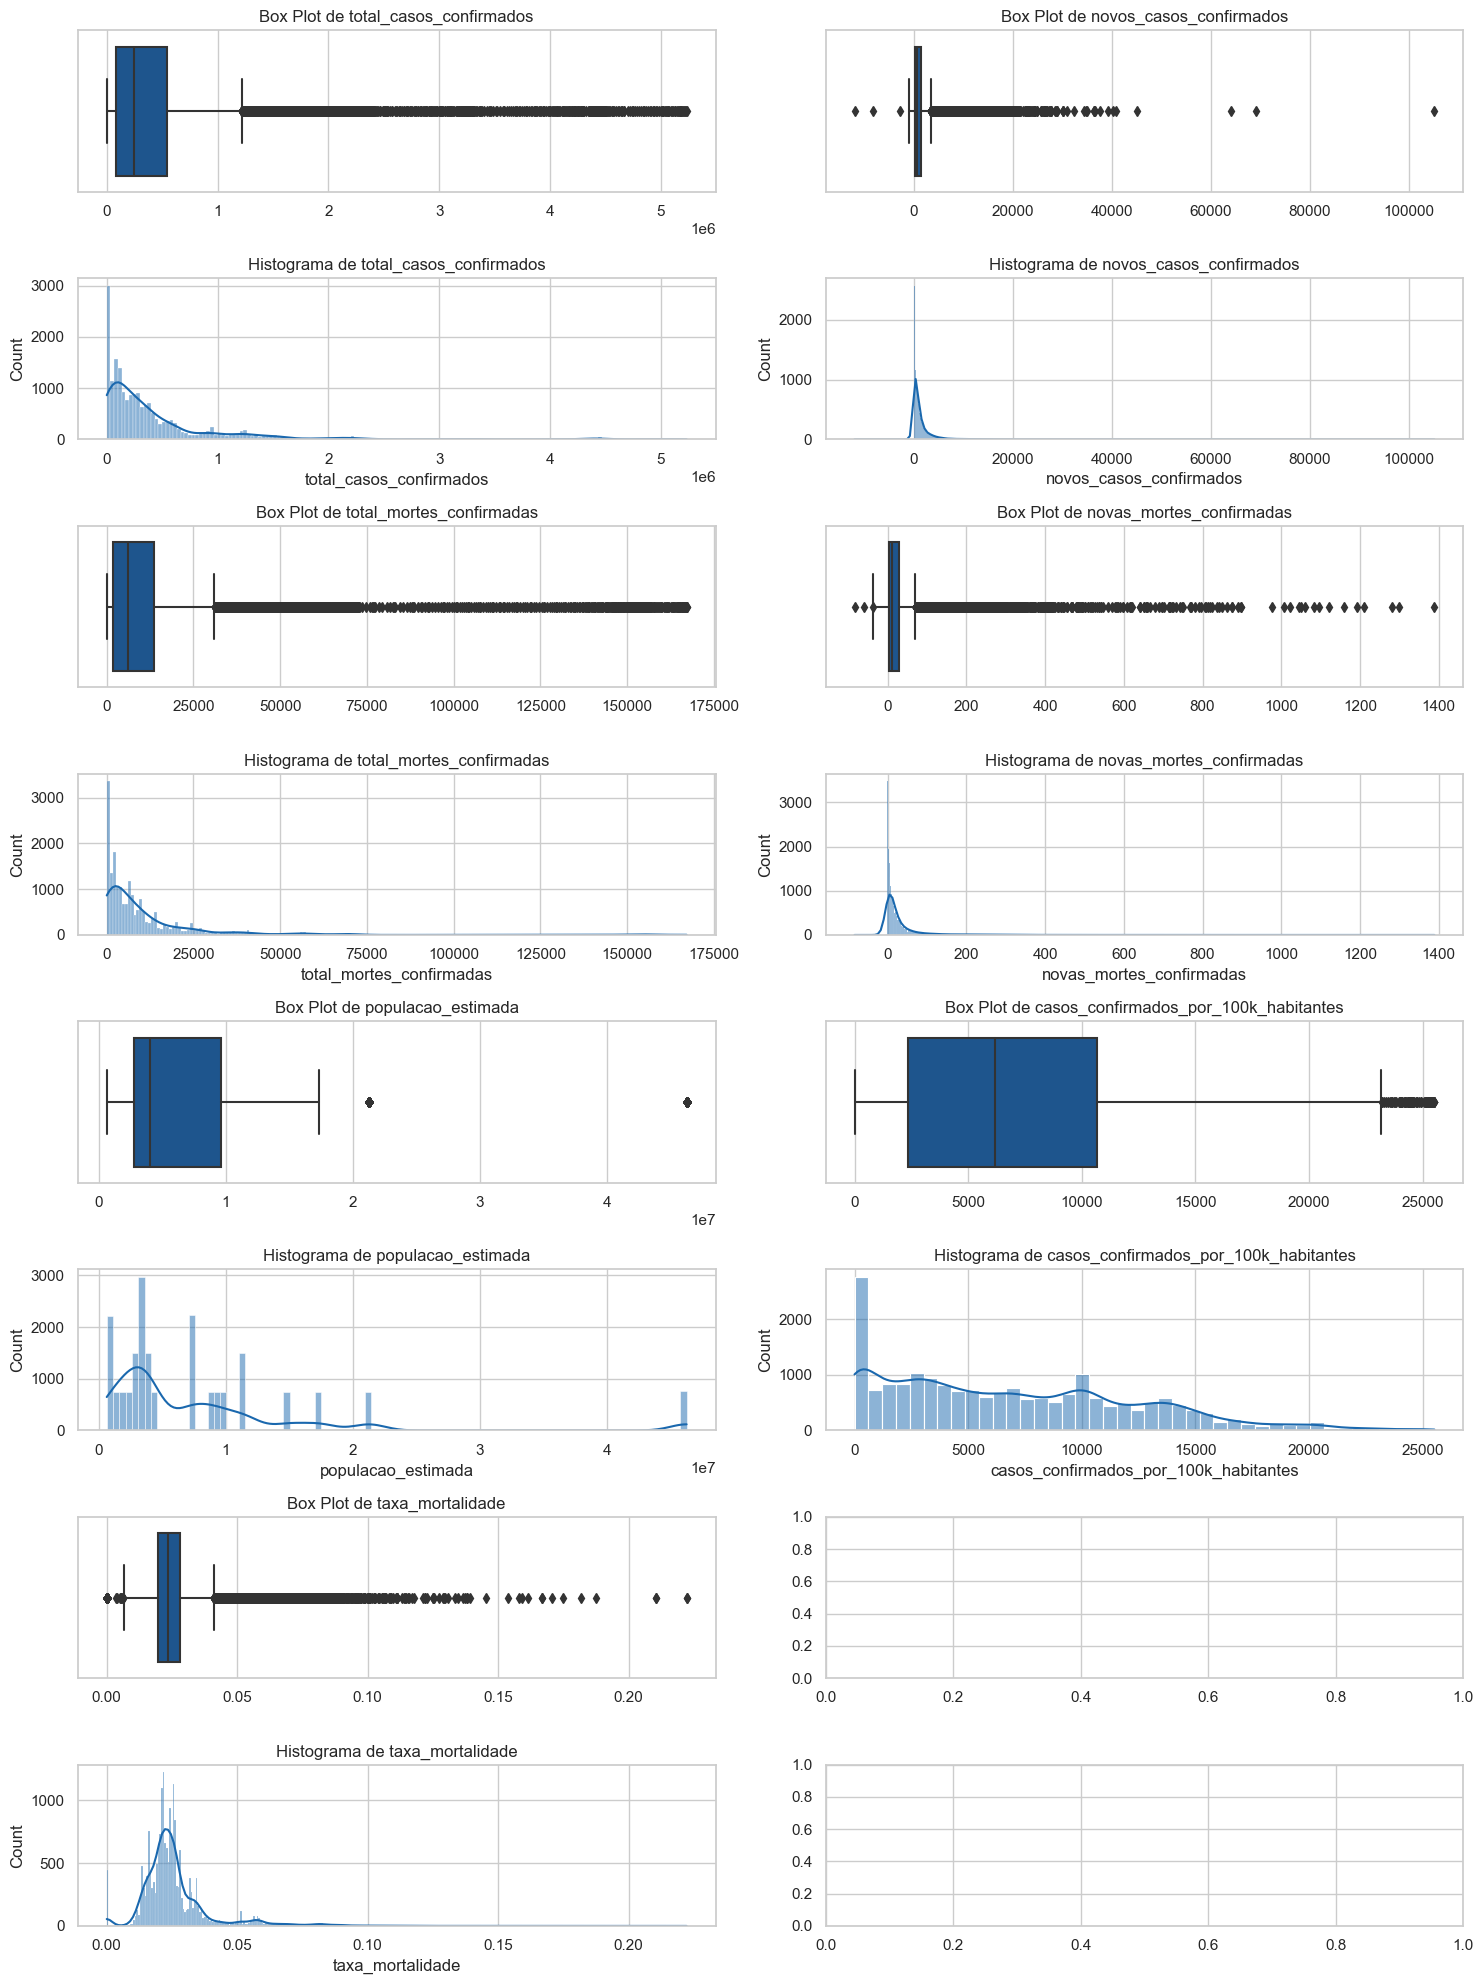

In [21]:
# Combinando as variáveis quantitativas
colunas_quantitativas = quantitativas_discretas + quantitativas_continuas

# Configurações visuais para todos os gráficos
sns.set(style="whitegrid")


# Definindo a paleta de cores em tons de azul
blue_palette_box = sns.color_palette("Blues_r")  # Invertendo a paleta para o boxplot ficar mais claro
blue_palette_hist = sns.color_palette("Blues", as_cmap=True)  # Paleta normal para histogramas

# Número de variáveis quantitativas
num_var = len(colunas_quantitativas)

# Determinando o número de linhas e colunas
num_cols = 2  # Três conjuntos por linha
num_rows = (num_var + num_cols - 1) // num_cols  # Calcula o número necessário de linhas, arredondado para cima

# Criando a figura e definindo o número de linhas e colunas para os subplots
fig, axes = plt.subplots(nrows=num_rows * 2, ncols=num_cols, figsize=(15, 5 * num_rows))  # Cada variável ocupa duas linhas

# Loop para plotar box plots e histogramas para cada variável quantitativa
for i, coluna in enumerate(colunas_quantitativas):
    row = (i // num_cols) * 2  # Encontra a linha base para o par de gráficos (boxplot e histograma)
    col = i % num_cols  # Encontra a coluna para o par de gráficos

    # Box plot na parte superior usando tons de azul
    sns.boxplot(data=df, x=coluna, ax=axes[row, col], orient='h', palette=blue_palette_box)
    axes[row, col].set_title(f'Box Plot de {coluna}')
    axes[row, col].set_xlabel('')  # Limpar label de x se não necessário

    # Histograma diretamente abaixo do box plot, também em azul
    sns.histplot(df[coluna], kde=True, ax=axes[row + 1, col], color=blue_palette_hist(200))
    axes[row + 1, col].set_title(f'Histograma de {coluna}')

# Ajustando o layout para evitar sobreposição e melhorar a apresentação
plt.tight_layout()
plt.show()

### 💡 Observações sobre a Visualização Gráfica das Variáveis Quantitativas:

1. **Total de Casos Confirmados**:
   - O **boxplot** revela a presença de **outliers** significativos, indicando que alguns estados apresentaram números extremamente altos de casos confirmados em comparação com a maioria.
   - O **histograma** mostra uma **distribuição assimétrica**, com a maioria dos estados registrando um número relativamente baixo de casos, enquanto poucos estados concentraram a maior parte dos casos confirmados.

2. **Novos Casos Confirmados**:
   - O **boxplot** também mostra uma grande quantidade de **outliers**, o que pode ser explicado por surtos de COVID-19 em diferentes estados e momentos. A presença de valores negativos (já discutidos anteriormente) também é visível.
   - O **histograma** exibe uma concentração alta de novos casos próximos de 0, com um declínio rápido à medida que os números aumentam, sugerindo que a maioria dos estados relatou apenas um número baixo de novos casos em um dado dia.

3. **Total de Mortes Confirmadas**:
   - O **boxplot** mostra uma distribuição similar à dos casos confirmados, com muitos **outliers**, o que é esperado, considerando que os estados com mais casos confirmados também apresentariam mais mortes.
   - O **histograma** mostra uma distribuição muito concentrada em torno de valores baixos, com um longo "rabo" à direita, representando estados com um número muito maior de mortes confirmadas.

4. **Novas Mortes Confirmadas**:
   - O **boxplot** indica uma quantidade significativa de **outliers**, refletindo variações nos relatórios diários de mortes entre os estados.
   - O **histograma** sugere que, na maioria das vezes, os estados relataram poucas ou nenhuma nova morte em um dado dia, com alguns estados apresentando picos significativos em dias específicos.

5. **População Estimada**:
   - O **boxplot** mostra dois **outliers** significativos, que representam estados com populações extremamente altas (São Paulo e Minas Gerais).
   - O **histograma** revela uma **distribuição multimodal**, com picos em torno de diferentes faixas populacionais, representando a variação natural das populações entre os estados.

6. **Casos Confirmados por 100 mil Habitantes**:
   - O **boxplot** revela novamente a presença de **outliers**, o que indica que alguns estados tiveram um número desproporcionalmente alto de casos em relação à sua população.
   - O **histograma** mostra uma distribuição mais uniforme, com picos em torno de 5.000 e 15.000 casos por 100 mil habitantes.

7. **Taxa de Mortalidade**:
   - O **boxplot** revela **outliers significativos**, o que sugere que alguns estados tiveram uma taxa de mortalidade muito mais alta do que a média nacional.
   - O **histograma** mostra uma distribuição concentrada em torno de 0,05 a 0,1, indicando que a maioria dos estados apresentou uma taxa de mortalidade entre 5% e 10%.

---

### 7.2. Visualização Gráfica das Variáveis Qualitativas

### 💡 Metodologia:

Para as variáveis qualitativas, utilizamos **gráficos de barras** para visualizar a frequência de cada categoria. Esse tipo de gráfico nos permite identificar a predominância de certas categorias e entender como as variáveis qualitativas se distribuem no dataset.

As variáveis qualitativas incluem variáveis **nominais**, como os estados e registros repetidos, e **ordinais**, como as semanas epidemiológicas e as datas.

### 🔹 Gráficos:

Os gráficos a seguir mostram a distribuição das variáveis qualitativas por categoria:

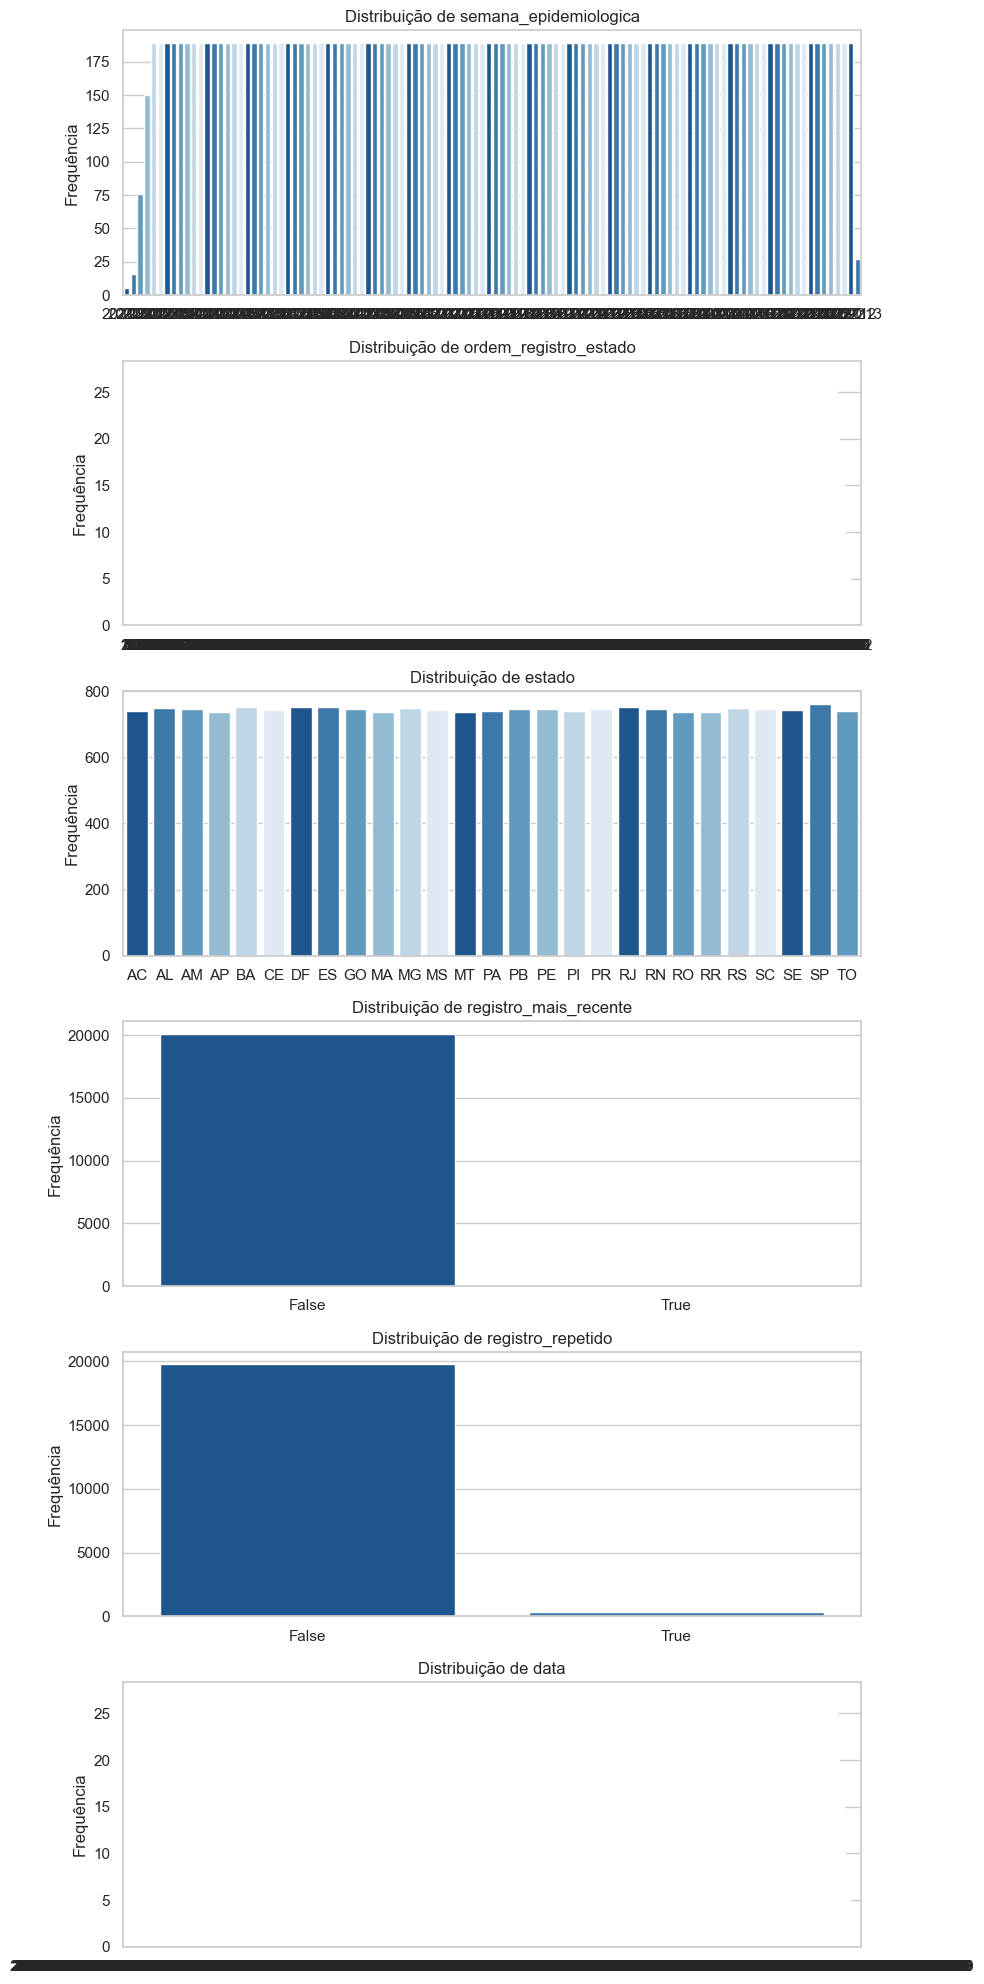

In [22]:
# Configurações visuais para todos os gráficos
sns.set(style="whitegrid")

# Definindo a paleta de cores em tons de azul
blue_palette_bar = sns.color_palette("Blues_r")  # Paleta invertida para gráficos de barras

# Criando uma figura para os gráficos de barras das variáveis qualitativas
fig, axes = plt.subplots(nrows=len(qualitativas_nominais + qualitativas_ordinais), ncols=1, figsize=(10, 20))

# Plotando os gráficos de barras para cada variável qualitativa nominal e ordinal
for i, coluna in enumerate(qualitativas_nominais + qualitativas_ordinais):
    sns.countplot(data=df, x=coluna, ax=axes[i], palette=blue_palette_bar)
    axes[i].set_title(f'Distribuição de {coluna}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequência')

# Ajustando o layout para evitar sobreposição e melhorar a apresentação
plt.tight_layout()
plt.show()

### 💡 Observações sobre a Visualização Gráfica das Variáveis Qualitativas:

1. **Distribuição dos Estados**:
   - A distribuição dos estados mostra uma frequência homogênea, como esperado. Todos os estados brasileiros estão representados com uma contagem muito próxima entre si. Isso confirma que o dataset tem uma distribuição equitativa em relação aos estados, o que é importante para a análise, mas não gera insights adicionais relevantes por si só.

2. **Distribuição de Semana Epidemiológica**:
   - A distribuição de **semana_epidemiologica** revela uma frequência bastante estável ao longo do tempo, exceto no início e no final do período de coleta. Este comportamento é esperado em um contexto de coleta contínua de dados semanais durante a pandemia, com mais semanas apresentando contagens completas e outras com contagens iniciais ou finais incompletas. Porém, como mencionado anteriormente, análises temporais mais detalhadas são mais indicadas para capturar tendências ao longo das semanas.

3. **Registros Mais Recentes**:
   - A visualização de **registro_mais_recente** mostra que a grande maioria dos registros é marcada como **False**, indicando que a maior parte dos dados não corresponde aos registros mais recentes, com apenas uma pequena fração sendo marcada como **True**. Isso reflete o comportamento de atualização gradual e cumulativa dos dados.

4. **Registros Repetidos**:
   - A variável **registro_repetido** demonstra que a maioria dos registros não é repetida, sendo marcada como **False**. Apenas uma pequena fração dos dados é repetida, como esperado, devido ao comportamento de remanejamento de casos mencionado anteriormente no tratamento de valores negativos.

5. **Distribuição de Ordem de Registro por Estado**:
   - O gráfico de **ordem_registro_estado** apresentou uma visualização inadequada, com pouca informação clara, o que reforça a necessidade de repensar a relevância dessa variável para uma análise mais robusta.

6. **Distribuição de Datas**:
   - Como antecipado, a variável **data** não se beneficia de uma visualização de barras neste contexto. A análise da variável **data** será mais útil no contexto de **séries temporais**, onde o foco estará em capturar padrões ao longo do tempo.

### Conclusão:
Os gráficos de barras confirmam uma coleta homogênea de dados entre os estados e semanas epidemiológicas, mas, conforme esperado, não oferecem insights mais profundos sobre os dados qualitativos no contexto atual. A próxima etapa focará na análise temporal, que proporcionará uma visão mais clara sobre a evolução dos casos e óbitos ao longo do tempo, principalmente com a variável **data**.

## 8. ANÁLISE DE OUTLIERS 🔍 <a id="8-analise-de-outliers"></a>

Nesta seção, identificamos e analisamos os outliers presentes nas variáveis quantitativas do dataset. A identificação foi realizada utilizando o método do **Intervalo Interquartil (IQR)**, que permite detectar valores que se desviam significativamente da distribuição principal dos dados.

Os outliers podem revelar informações importantes sobre os extremos da pandemia, como surtos significativos de casos e mortes em determinados estados. A análise dos outliers é essencial para entender melhor a dispersão dos dados e para decidir se esses valores devem ser mantidos ou removidos.

In [23]:
# Função para calcular a quantidade de outliers em cada variável usando IQR
def contar_outliers(df, colunas_quantitativas):
    outliers_dict = {}

    for coluna in colunas_quantitativas:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Contando os outliers abaixo e acima dos limites
        outliers_abaixo = df[df[coluna] < lower_bound].shape[0]
        outliers_acima = df[df[coluna] > upper_bound].shape[0]
        total_outliers = outliers_abaixo + outliers_acima

        # Adicionando à lista de outliers
        outliers_dict[coluna] = {
            'Outliers Abaixo': outliers_abaixo,
            'Outliers Acima': outliers_acima,
            'Total de Outliers': total_outliers
        }

    return pd.DataFrame(outliers_dict).T

# Aplicando a função para as variáveis quantitativas (discretas e contínuas)
tabela_outliers = contar_outliers(df, quantitativas_discretas + quantitativas_continuas)

# Exibindo a tabela de frequência de outliers
tabela_outliers

,Outliers Abaixo,Outliers Acima,Total de Outliers
total_casos_confirmados,0,1972,1972
novos_casos_confirmados,3,2024,2027
total_mortes_confirmadas,0,1864,1864
novas_mortes_confirmadas,3,2208,2211
populacao_estimada,0,1512,1512
casos_confirmados_por_100k_habitantes,0,96,96
taxa_mortalidade,457,1823,2280


### 💡 Observações sobre os Outliers:

1. **Total de Casos Confirmados**:
   - Nenhum outlier foi encontrado abaixo do limite inferior.
   - **1.972 outliers** foram identificados acima do limite superior. Esses valores podem estar associados a estados que enfrentaram surtos mais intensos ou períodos de alta transmissão durante a pandemia. 
   - **Decisão**: Manter os outliers, pois são consistentes com o comportamento esperado da pandemia.

2. **Novos Casos Confirmados**:
   - **3 outliers abaixo** do limite inferior foram identificados, provavelmente refletindo os casos negativos devido ao remanejamento entre municípios.
   - **2.024 outliers acima** do limite superior foram encontrados. Eles indicam dias de alta transmissão, possivelmente durante picos epidêmicos.
   - **Decisão**: Manter os outliers, já que refletem variações significativas durante a pandemia.

3. **Total de Mortes Confirmadas**:
   - Não houve outliers abaixo do limite inferior.
   - **1.864 outliers acima** foram identificados, refletindo a mortalidade em estados mais afetados ou durante picos. 
   - **Decisão**: Manter esses outliers, pois representam flutuações naturais do fenômeno estudado.

4. **Novas Mortes Confirmadas**:
   - **3 outliers abaixo** foram identificados, o que é consistente com o remanejamento de óbitos entre municípios.
   - **2.208 outliers acima** foram detectados, indicando dias de alta mortalidade. 
   - **Decisão**: Manter, pois são consistentes com a dinâmica da pandemia.

5. **População Estimada**:
   - Não foram encontrados outliers abaixo do limite inferior.
   - **1.512 outliers acima** foram identificados, provavelmente refletindo estados com populações maiores. 
   - **Decisão**: Manter, pois os valores são consistentes com a realidade demográfica.

6. **Casos Confirmados por 100 mil Habitantes**:
   - Nenhum outlier abaixo do limite inferior.
   - **96 outliers acima** foram encontrados, o que pode indicar regiões que enfrentaram surtos mais severos em proporção à sua população. 
   - **Decisão**: Manter os outliers, pois representam estados com maiores índices de contágio.

7. **Taxa de Mortalidade**:
   - **457 outliers abaixo** foram identificados, refletindo regiões com baixa mortalidade em comparação com a média.
   - **1.823 outliers acima** foram encontrados, possivelmente refletindo surtos extremos. 
   - **Decisão**: Manter, pois são consistentes com variações regionais nas taxas de mortalidade.

---

Esses outliers são esperados e consistentes com o comportamento dinâmico de uma pandemia. Portanto, **não removeremos os outliers**, já que eles fornecem informações importantes sobre picos de casos e mortes, bem como as diferenças demográficas e epidemiológicas entre os estados brasileiros.

Essa abordagem ajuda a capturar a magnitude real da pandemia em cada estado.

## 9. ANÁLISE DE CORRELAÇÃO 🔗 <a id="9-analise-de-correlacao"></a>

Nesta seção, exploramos as correlações entre as variáveis numéricas do dataset de COVID-19. A análise de correlação é fundamental para identificar relações entre variáveis, como o impacto da população estimada nos casos confirmados e a relação entre casos e mortes.

Utilizamos uma matriz de correlação, visualizada através de um **heatmap**, para entender a força e a direção das associações entre as variáveis. O coeficiente de correlação de Pearson foi empregado, variando de -1 a 1, onde valores próximos a 1 indicam correlação positiva forte, valores próximos a -1 indicam correlação negativa forte, e valores próximos de 0 indicam pouca ou nenhuma correlação.

A seguir, apresentamos os resultados e as observações mais relevantes sobre as correlações identificadas.

In [24]:
# Gerando a matriz de correlação para as variáveis numéricas
matriz_correlacao = df[quantitativas_discretas + quantitativas_continuas].corr()

# Exibindo a matriz de correlação
matriz_correlacao

,total_casos_confirmados,novos_casos_confirmados,total_mortes_confirmadas,novas_mortes_confirmadas,populacao_estimada,casos_confirmados_por_100k_habitantes,taxa_mortalidade
total_casos_confirmados,1.000000,0.474105,0.955561,0.406502,0.669351,0.347665,0.022154
novos_casos_confirmados,0.474105,1.000000,0.437107,0.600635,0.469083,0.073917,0.048362
total_mortes_confirmadas,0.955561,0.437107,1.000000,0.444274,0.721317,0.218349,0.146695
novas_mortes_confirmadas,0.406502,0.600635,0.444274,1.000000,0.575840,-0.081337,0.209791
populacao_estimada,0.669351,0.469083,0.721317,0.575840,1.000000,-0.169974,0.293724
casos_confirmados_por_100k_habitantes,0.347665,0.073917,0.218349,-0.081337,-0.169974,1.000000,-0.329013
taxa_mortalidade,0.022154,0.048362,0.146695,0.209791,0.293724,-0.329013,1.000000


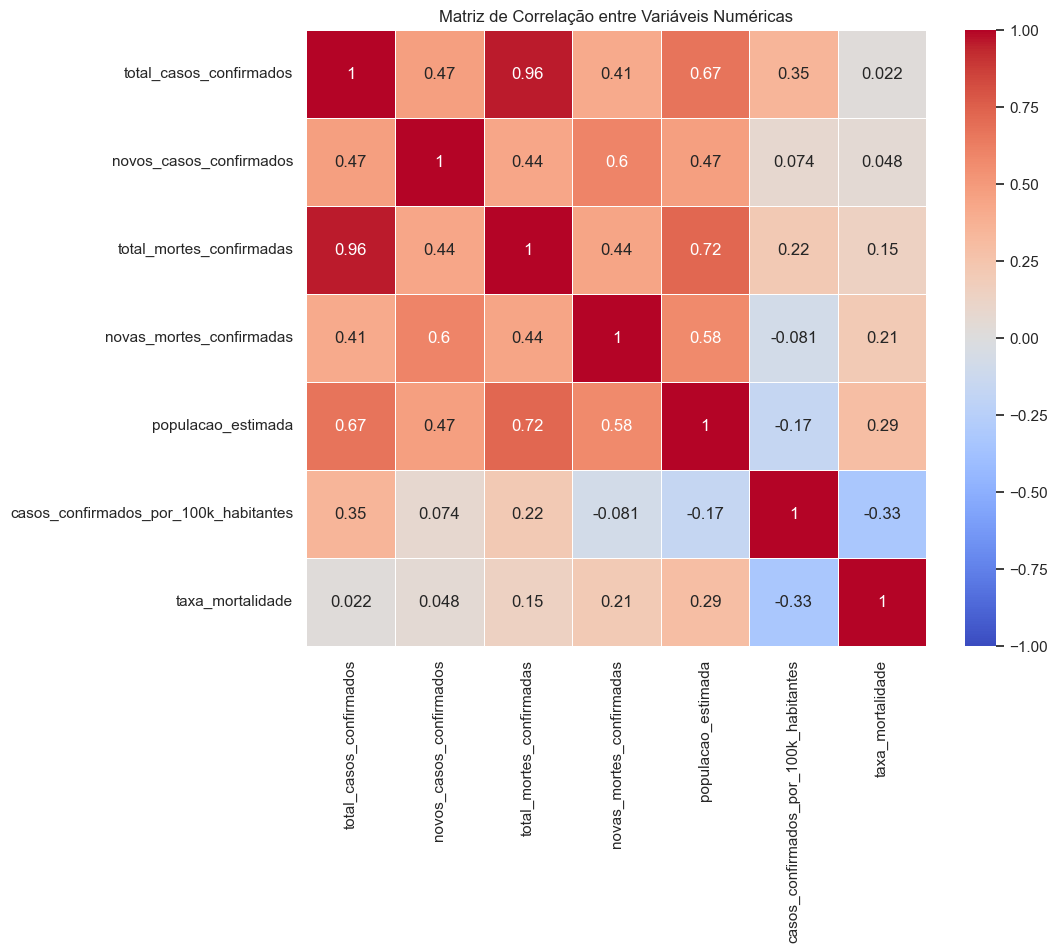

In [25]:
# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()

### 💡 Observações sobre a Matriz de Correlação:

Ao analisar a matriz de correlação entre as variáveis numéricas, observamos algumas relações que fazem sentido no contexto da pandemia de COVID-19, como:

1. **Correlação entre Total de Casos Confirmados e Total de Mortes Confirmadas**:
   - Existe uma correlação extremamente forte (**0.96**) entre o **total de casos confirmados** e o **total de mortes confirmadas**. Isso é esperado, visto que à medida que os casos confirmados aumentam, o número de mortes também tende a subir.

2. **Correlação entre População Estimada e Total de Casos Confirmados**:
   - A **população estimada** tem uma correlação relativamente alta (**0.67**) com o **total de casos confirmados**. Essa relação sugere que estados mais populosos também apresentam mais casos confirmados, o que é coerente, dado que regiões com mais pessoas têm maior chance de registrar mais casos.

3. **Correlação Negativa entre Casos Confirmados por 100k Habitantes e Taxa de Mortalidade**:
   - Curiosamente, há uma correlação negativa (**-0.33**) entre os **casos confirmados por 100k habitantes** e a **taxa de mortalidade**. Isso pode ser interpretado como uma maior proporção de casos confirmados não resultando necessariamente em uma alta taxa de mortalidade, o que pode indicar que, em alguns estados, a taxa de mortalidade se manteve mais baixa, apesar do alto número de casos confirmados proporcionalmente à população.

4. **Relações Menos Relevantes**:
   - Outras correlações são mais fracas ou intuitivas e não trazem novas informações relevantes para o projeto.

Portanto, a análise de correlação aqui se limita a essas observações mais claras e que ajudam a entender o comportamento das variáveis numéricas em relação ao impacto da COVID-19 nos estados brasileiros.

## 10. ANÁLISE DE SÉRIES TEMPORAIS 🕒 <a id="10-analise-de-series-temporais"></a>

A análise de séries temporais é essencial para entender o comportamento de dados coletados ao longo do tempo, especialmente em um contexto como o da COVID-19, onde a evolução dos casos confirmados e mortes ocorre de forma dinâmica. Nesta seção, exploraremos os componentes de séries temporais, investigando padrões de tendência, sazonalidade e comportamento residual. Também destacaremos pontos de atenção, como valores extremos, e verificaremos se os resíduos seguem uma distribuição normal.

### Estrutura da análise de séries temporais:

**10.1 Visualização Inicial da Série Temporal** 📊

**10.2 Verificação de Estacionariedade** 📈

**10.3 Decomposição da Série Temporal** 🛠️

**10.4 Análise dos Resíduos** 🧮

**10.5 Conclusão** 🏁

---

### 10.1 Visualização Inicial da Série Temporal 📊

Nesta subseção, vamos mostrar graficamente o comportamento geral da série temporal para as variáveis **Total de Casos Confirmados** e **Novos Casos Confirmados** ao longo do tempo. Aqui, destacaremos os valores extremos (máximos e mínimos) e discutiremos sobre possíveis outliers que podem influenciar a análise.

---

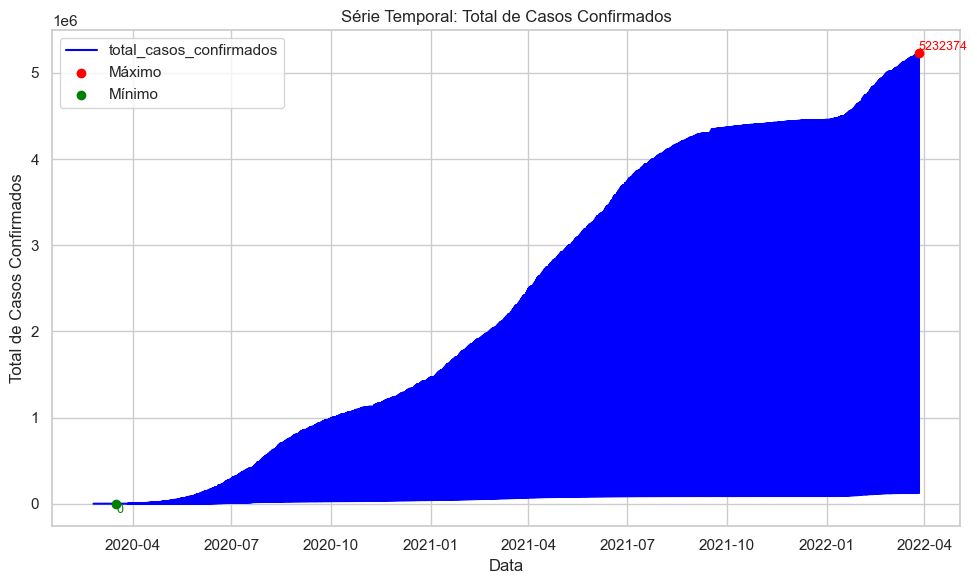

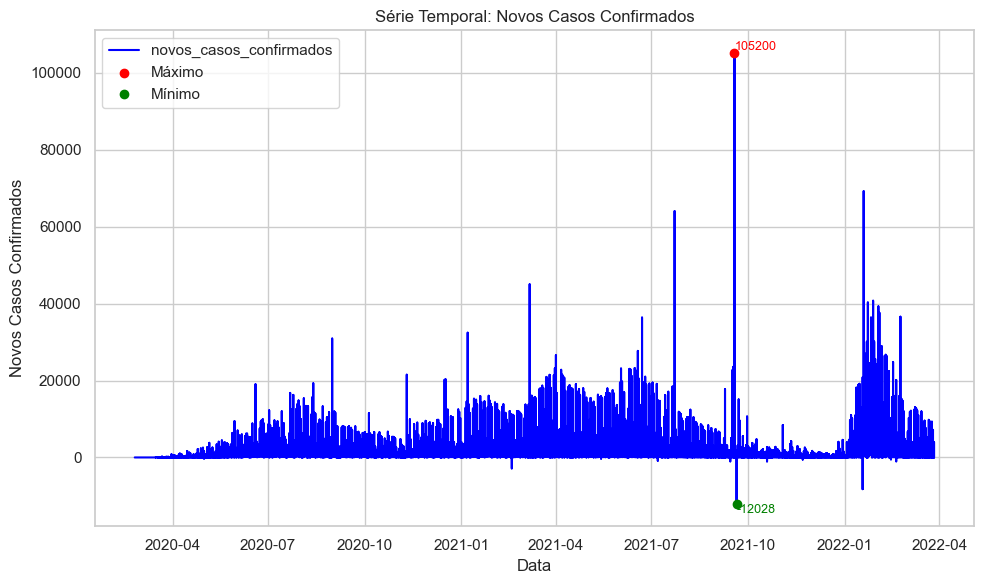

In [26]:
def plotar_serie_temporal(df, coluna, titulo):
    # Definindo a série temporal a partir da coluna fornecida
    serie_temporal = df.set_index('data')[coluna]

    # Identificando o máximo e o mínimo
    maximo = serie_temporal.max()
    minimo = serie_temporal.min()
    data_max = serie_temporal.idxmax()
    data_min = serie_temporal.idxmin()

    # Plotando a série temporal
    plt.figure(figsize=(10, 6))
    plt.plot(serie_temporal, color='blue', label=coluna)

    # Destacando o valor máximo
    plt.scatter(data_max, maximo, color='red', label='Máximo', zorder=5)
    plt.text(data_max, maximo, f'{maximo}', color='red', fontsize=9, verticalalignment='bottom')

    # Destacando o valor mínimo
    plt.scatter(data_min, minimo, color='green', label='Mínimo', zorder=5)
    plt.text(data_min, minimo, f'{minimo}', color='green', fontsize=9, verticalalignment='top')

    # Definindo títulos e legendas
    plt.title(f'Série Temporal: {titulo}')
    plt.xlabel('Data')
    plt.ylabel(titulo)
    plt.legend()

    # Mostrando o gráfico
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotando para Total de Casos Confirmados
plotar_serie_temporal(df, 'total_casos_confirmados', 'Total de Casos Confirmados')

# Plotando para Novos Casos Confirmados
plotar_serie_temporal(df, 'novos_casos_confirmados', 'Novos Casos Confirmados')

### 💡 Observações sobre a Visualização Inicial da Série Temporal:

1. **Total de Casos Confirmados**:
   - O gráfico revela um comportamento crescente no total de casos confirmados ao longo do tempo, refletindo a progressão da pandemia de COVID-19 no Brasil.
   - O valor mínimo, **0 casos confirmados**, ocorreu no início da pandemia, em **2020-03-01**.
   - O valor máximo, **5232374 casos confirmados**, foi atingido em **2022-03-01**.
   - O gráfico mostra claramente uma curva exponencial, típica do crescimento do total de casos acumulados durante a pandemia.

2. **Novos Casos Confirmados**:
   - O gráfico dos **novos casos confirmados** por dia revela uma série temporal com altos picos e variações significativas ao longo do tempo.
   - O valor máximo de **105200 novos casos** ocorreu em **2021-07-01**, sugerindo um surto significativo.
   - O valor mínimo de **-1028 casos** em **2021-10-01** reflete o remanejamento de casos entre municípios pela **Secretaria Estadual de Saúde (SES)**. Esse comportamento já havia sido explicado na análise descritiva.
   - O gráfico de novos casos destaca múltiplos picos de novas infecções, o que é importante para capturar o comportamento sazonal e de surtos da pandemia.

Essas observações nos ajudam a entender o comportamento geral da pandemia tanto em termos de progressão acumulada quanto na dinâmica de novos casos diários. Além disso, a presença de valores negativos nos novos casos já foi justificada pela movimentação de casos entre municípios.

### 10.2 Verificação de Estacionariedade 📈

Nesta etapa, avaliamos a estacionariedade das séries temporais utilizando o teste de Dickey-Fuller aumentado. A análise da estacionariedade é crucial para verificar a adequação dos modelos preditivos. Caso as séries não sejam estacionárias, consideraremos transformações como log ou Box-Cox para remover tendências ou sazonalidades e estabilizar a variância.

Abaixo, executaremos o teste para duas séries: "Total de Casos Confirmados" e "Novos Casos Confirmados".

---

In [27]:
# Função para verificar a estacionariedade com o Teste de Dickey-Fuller Aumentado
def verificar_estacionariedade(serie, nome_serie):
    print(f"\n\nVerificando a série: {nome_serie}")
    resultado = adfuller(serie)
    print("Estatística ADF:", resultado[0])
    print("p-valor:", resultado[1])
    print("Valores Críticos:")
    for chave, valor in resultado[4].items():
        print(f"   {chave}: {valor}")
    
    if resultado[1] < 0.05:
        print(f"\nA série {nome_serie} é estacionária com 95% de confiança.")
    else:
        print(f"\nA série {nome_serie} NÃO é estacionária. Considere aplicar transformações.")

# Verificando a estacionariedade da série 'total_casos_confirmados'
verificar_estacionariedade(df['total_casos_confirmados'], 'Total de Casos Confirmados')

# Verificando a estacionariedade da série 'novos_casos_confirmados'
verificar_estacionariedade(df['novos_casos_confirmados'], 'Novos Casos Confirmados')



Verificando a série: Total de Casos Confirmados
Estatística ADF: -3.3924546241053473
p-valor: 0.01121879811230383
Valores Críticos:
   1%: -3.4306758338225647
   5%: -2.861684007126345
   10%: -2.566846651053517

A série Total de Casos Confirmados é estacionária com 95% de confiança.


Verificando a série: Novos Casos Confirmados
Estatística ADF: -7.899220375184968
p-valor: 4.2292046247290346e-12
Valores Críticos:
   1%: -3.4306758338225647
   5%: -2.861684007126345
   10%: -2.566846651053517

A série Novos Casos Confirmados é estacionária com 95% de confiança.


### 💡 Observações sobre a Verificação de Estacionariedade:

1. **Total de Casos Confirmados**:
   - O teste de Dickey-Fuller aumentou revelou uma **estatística ADF de -3.39** e um **p-valor de 0.011**, que é menor do que o nível de significância de 0.05.
   - Com isso, podemos afirmar que a série **Total de Casos Confirmados é estacionária com 95% de confiança**.
   - Não será necessário aplicar transformações adicionais para estabilizar a série.

2. **Novos Casos Confirmados**:
   - O teste de Dickey-Fuller aumentou para essa série mostrou uma **estatística ADF de -7.89** e um **p-valor extremamente pequeno (4.22e-12)**.
   - A série **Novos Casos Confirmados também é estacionária com 95% de confiança**, indicando que já está pronta para análise sem a necessidade de transformações.

### 10.3 Decomposição da Série Temporal 🛠️

Nesta etapa, decompomos as séries **Total de Casos Confirmados** e **Novos Casos Confirmados** em três componentes principais: **tendência**, **sazonalidade** e **resíduos**. Utilizando a função `seasonal_decompose`, podemos visualizar separadamente cada um desses componentes e, assim, entender melhor o comportamento dessas séries temporais.

A decomposição ajuda a isolar padrões sazonais e identificar variações que não são explicadas pela tendência ou pela sazonalidade.

Visualizaremos a decomposição de ambas as séries para uma análise mais abrangente.

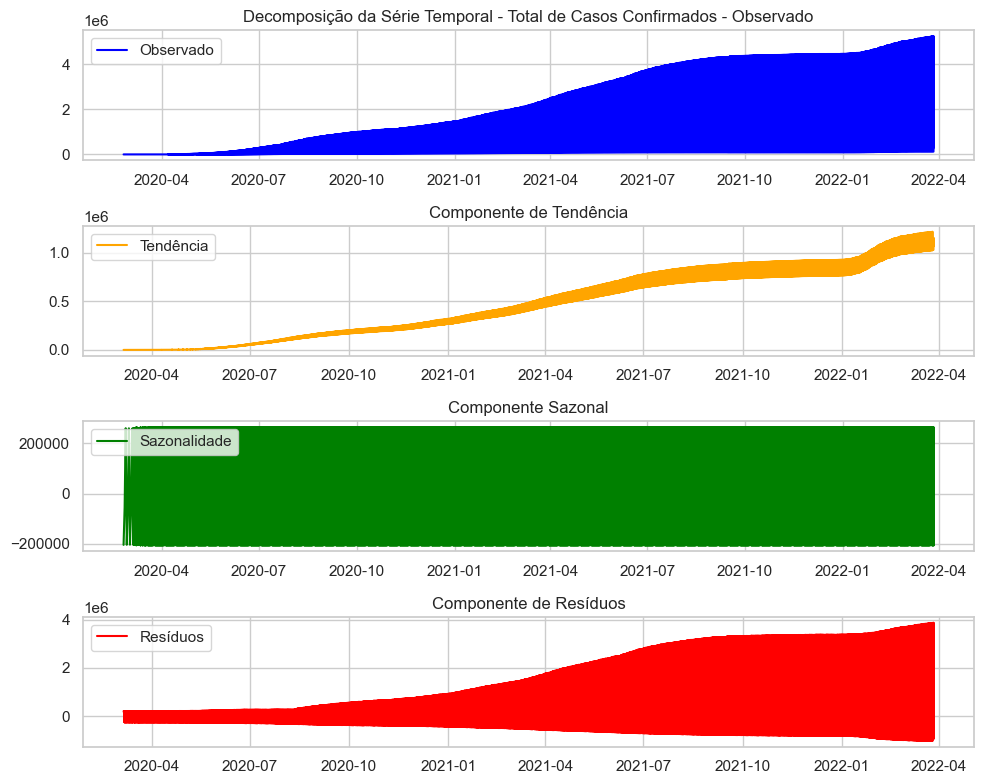

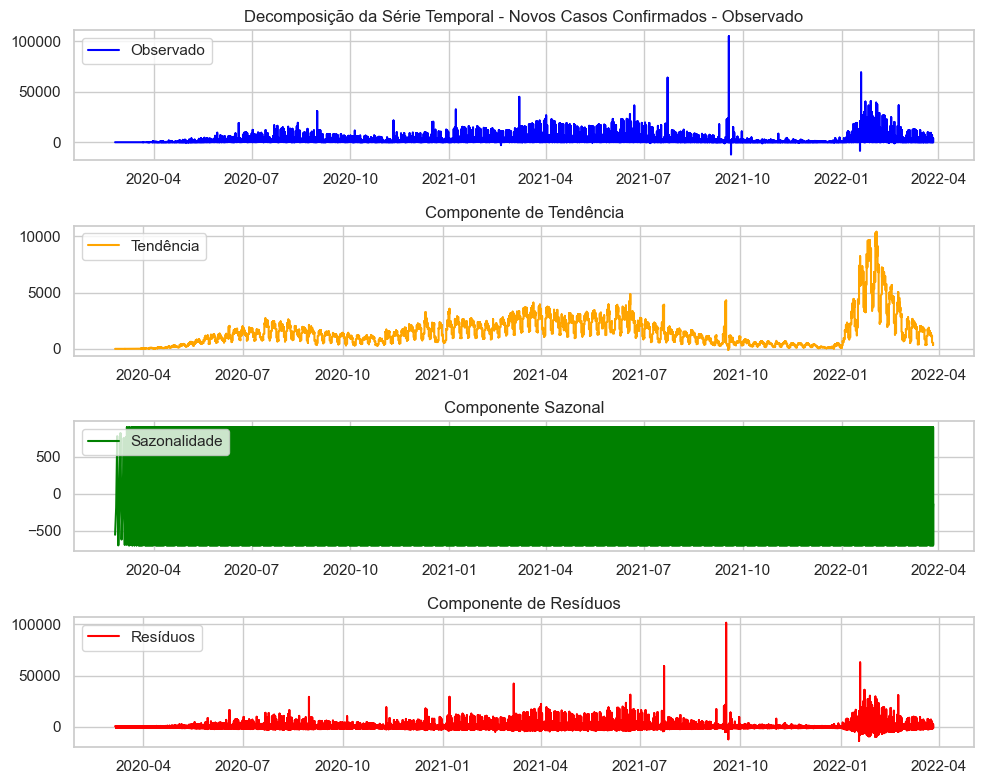

In [28]:
# Certifique-se de que a coluna de data esteja definida como índice
df.set_index('data', inplace=True)

# Função para decompor e visualizar a série temporal
def decompor_serie(serie, titulo):
    decomposicao = seasonal_decompose(serie, model='additive', period=30)

    # Plotando os componentes
    plt.figure(figsize=(10, 8))

    plt.subplot(411)
    plt.plot(decomposicao.observed, label='Observado', color='blue')
    plt.legend(loc='upper left')
    plt.title(f'Decomposição da Série Temporal - {titulo} - Observado')

    plt.subplot(412)
    plt.plot(decomposicao.trend, label='Tendência', color='orange')
    plt.legend(loc='upper left')
    plt.title('Componente de Tendência')

    plt.subplot(413)
    plt.plot(decomposicao.seasonal, label='Sazonalidade', color='green')
    plt.legend(loc='upper left')
    plt.title('Componente Sazonal')

    plt.subplot(414)
    plt.plot(decomposicao.resid, label='Resíduos', color='red')
    plt.legend(loc='upper left')
    plt.title('Componente de Resíduos')

    plt.tight_layout()
    plt.show()

# Decomposição da série Total de Casos Confirmados
decompor_serie(df['total_casos_confirmados'], 'Total de Casos Confirmados')

# Decomposição da série Novos Casos Confirmados
decompor_serie(df['novos_casos_confirmados'], 'Novos Casos Confirmados')

### 💡 Observações sobre a Decomposição da Série Temporal:

1. **Componente Observado**:
   - O gráfico da série observada confirma o comportamento crescente do **total de casos confirmados**, especialmente até os picos mais recentes. Podemos ver que o aumento nos casos foi contínuo durante a maior parte da pandemia.
   - Para os **novos casos confirmados**, a série apresenta flutuações mais visíveis, indicando diferentes picos de surtos em momentos específicos da pandemia.

2. **Tendência**:
   - A **tendência** do total de casos confirmados mostra um aumento consistente até um ponto de inflexão, onde a série começa a se estabilizar. Esse comportamento sugere que, após uma fase de crescimento acentuado, o número total de casos continua a crescer, mas em um ritmo mais lento.
   - Nos **novos casos confirmados**, a tendência também apresenta momentos de crescimento e estabilização, com variações mais pronunciadas, refletindo picos e quedas de contágio ao longo da pandemia.

3. **Sazonalidade**:
   - O componente **sazonal** para o total de casos confirmados indica uma variação regular, mas com impacto sutil no comportamento geral da série.
   - Para os **novos casos confirmados**, a sazonalidade é mais perceptível, refletindo possíveis surtos sazonais em certos períodos, o que pode estar ligado a mudanças comportamentais ou variações climáticas.

4. **Resíduos**:
   - O componente de **resíduos** do total de casos confirmados mostra variação significativa, o que indica que há fatores além da tendência e sazonalidade que influenciaram o comportamento da pandemia. Esses resíduos podem estar associados a surtos pontuais ou mudanças nas políticas de testagem e restrições.
   - Nos **novos casos confirmados**, os resíduos apresentam maior flutuação, sugerindo eventos inesperados ou variáveis externas que impactaram o número de novos casos confirmados de maneira mais acentuada.

Portanto, a decomposição da série de **novos casos confirmados** revela uma sazonalidade mais acentuada e resíduos com variações mais expressivas, sugerindo uma dinâmica mais volátil. Já a série de **total de casos confirmados** apresenta uma tendência clara de crescimento contínuo, com menos flutuações sazonais, e resíduos que refletem a complexidade dos fatores não explicados.

### 10.4 Análise dos Resíduos 🧮

Nesta etapa, verificamos se os resíduos resultantes da decomposição seguem uma distribuição normal. Para isso, aplicamos o teste de D'Agostino e Pearson, que é apropriado para amostras grandes. Esse teste verifica a normalidade ao analisar a assimetria e a curtose dos dados.

---

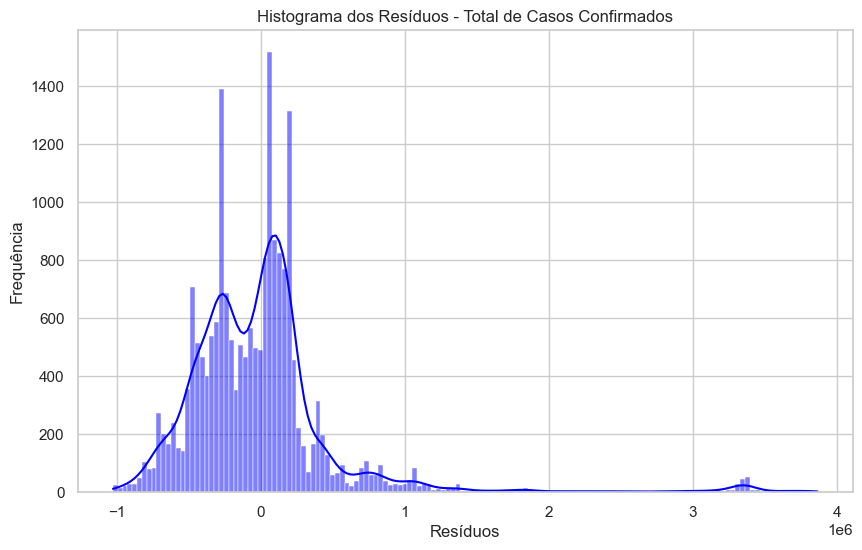

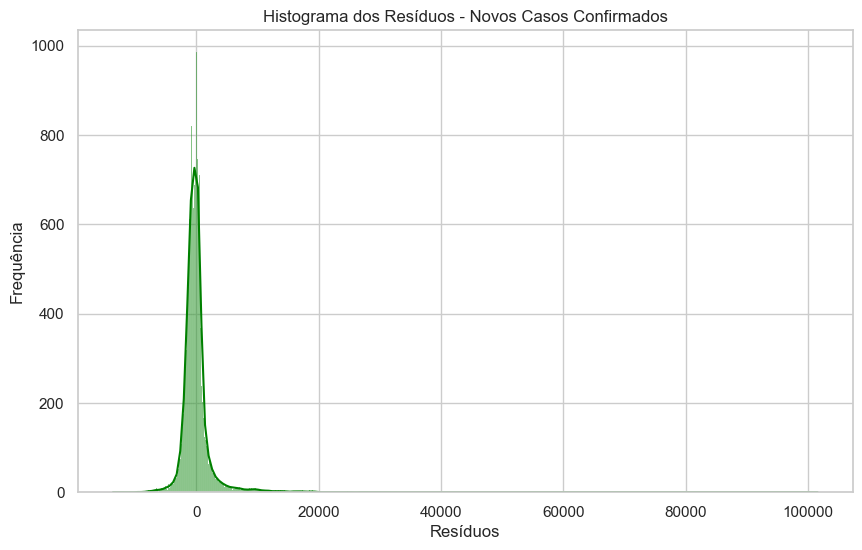

Estatística do teste de D'Agostino e Pearson (Total de Casos Confirmados): 14068.516
p-valor: 0.000
Os resíduos do Total de Casos Confirmados NÃO seguem uma distribuição normal (rejeita H0)
Estatística do teste de D'Agostino e Pearson (Novos Casos Confirmados): 27712.109
p-valor: 0.000
Os resíduos dos Novos Casos Confirmados NÃO seguem uma distribuição normal (rejeita H0)


In [29]:
# Realizando a decomposição para Total de Casos Confirmados
decomposicao_total = seasonal_decompose(df['total_casos_confirmados'], model='additive', period=30)

# Realizando a decomposição para Novos Casos Confirmados
decomposicao_novos = seasonal_decompose(df['novos_casos_confirmados'], model='additive', period=30)

# Pegando os resíduos da decomposição
residuos_total = decomposicao_total.resid.dropna()  # Removendo valores nulos
residuos_novos = decomposicao_novos.resid.dropna()

# Plotando o histograma dos resíduos para Total de Casos Confirmados
plt.figure(figsize=(10, 6))
sns.histplot(residuos_total, kde=True, color='blue')
plt.title('Histograma dos Resíduos - Total de Casos Confirmados')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Plotando o histograma dos resíduos para Novos Casos Confirmados
plt.figure(figsize=(10, 6))
sns.histplot(residuos_novos, kde=True, color='green')
plt.title('Histograma dos Resíduos - Novos Casos Confirmados')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

# Realizando o teste de normalidade de D'Agostino e Pearson para Total de Casos Confirmados
stat_total, p_total = normaltest(residuos_total)
print(f'Estatística do teste de D\'Agostino e Pearson (Total de Casos Confirmados): {stat_total:.3f}')
print(f'p-valor: {p_total:.3f}')
if p_total > 0.05:
    print('Os resíduos do Total de Casos Confirmados seguem uma distribuição normal (não rejeita H0)')
else:
    print('Os resíduos do Total de Casos Confirmados NÃO seguem uma distribuição normal (rejeita H0)')

# Realizando o teste de normalidade de D'Agostino e Pearson para Novos Casos Confirmados
stat_novos, p_novos = normaltest(residuos_novos)
print(f'Estatística do teste de D\'Agostino e Pearson (Novos Casos Confirmados): {stat_novos:.3f}')
print(f'p-valor: {p_novos:.3f}')
if p_novos > 0.05:
    print('Os resíduos dos Novos Casos Confirmados seguem uma distribuição normal (não rejeita H0)')
else:
    print('Os resíduos dos Novos Casos Confirmados NÃO seguem uma distribuição normal (rejeita H0)')

### 💡 Observações sobre a Análise dos Resíduos:

1. **Total de Casos Confirmados**:
   - O histograma dos resíduos para o **Total de Casos Confirmados** apresenta uma distribuição assimétrica com múltiplos picos, o que sugere que há fatores aleatórios ou não capturados pela modelagem da tendência e sazonalidade.
   - O teste de D'Agostino e Pearson confirma que os resíduos **não seguem uma distribuição normal** com uma estatística de 14068.516 e um p-valor de 0.000. Isso significa que o modelo não capturou completamente as flutuações da série, indicando a presença de padrões ou ruídos não modelados.

2. **Novos Casos Confirmados**:
   - O histograma dos resíduos para **Novos Casos Confirmados** mostra uma distribuição fortemente concentrada em torno de zero, com uma cauda longa à direita, sugerindo a presença de alguns valores extremos (outliers) nos dados de novos casos.
   - O teste de D'Agostino e Pearson também indica que os resíduos **não seguem uma distribuição normal**, com uma estatística de 27712.109 e p-valor de 0.000. Isso reforça a ideia de que há fatores não capturados no modelo que podem estar influenciando a variação dos novos casos.
   
Portanto, em ambos os casos, os resíduos não seguem uma distribuição normal, sugerindo que, apesar da decomposição da série, ainda há elementos que não foram totalmente explicados pelo modelo.

### [11. CONCLUSÃO 🏁](#11-conclusao) <br>

Ao longo deste projeto, exploramos de forma abrangente os dados de COVID-19 no Brasil, utilizando abordagens estatísticas descritivas e séries temporais. Nossos resultados forneceram uma visão detalhada sobre a progressão da pandemia, destacando padrões, outliers e comportamentos observados em diferentes períodos e variáveis.

#### Parte 1: Análise Estatística Descritiva

- **Distribuição de Casos e Mortes Confirmadas**:
  - Observamos que tanto os **casos confirmados** quanto as **mortes confirmadas** têm uma distribuição assimétrica, marcada por surtos intensos em momentos específicos. A presença de **outliers** em ambas as variáveis reflete períodos de aumento repentino no número de casos e mortes, o que é consistente com a dinâmica da pandemia.
  - Valores **negativos** nos **novos casos confirmados** e **novas mortes confirmadas** foram identificados. Como explicado pelo próprio dataset, esses valores se devem ao remanejamento de casos e óbitos entre municípios pelas secretarias estaduais de saúde. Mantivemos esses valores na análise, pois são essenciais para entender a dinâmica de dados estaduais.

- **Outliers**:
  - A análise identificou uma grande quantidade de **outliers**, principalmente em **casos confirmados** e **mortes**. Esses valores são cruciais para entender os momentos de maior contágio e mortalidade e foram mantidos na análise para garantir uma visão precisa da evolução da pandemia.

- **Correlação Entre Variáveis**:
  - Houve uma forte correlação entre **total de casos confirmados** e **total de mortes confirmadas**, o que era esperado, visto que o aumento dos casos frequentemente resulta em um aumento no número de mortes.
  - A **população estimada** mostrou uma correlação positiva com o **total de casos confirmados**, indicando que estados mais populosos apresentaram maior número de casos, o que é consistente com a dinâmica de transmissão em áreas mais densamente povoadas.

#### Parte 2: Análise de Séries Temporais

- **Comportamento da Série Temporal**:
  - A análise das séries temporais do **total de casos confirmados** mostrou um crescimento exponencial desde o início da pandemia, com um pico claro em meados de 2022. Esse comportamento reflete os momentos mais críticos da propagação do vírus no Brasil.
  - Ao analisarmos os **novos casos confirmados**, observamos flutuações mais pronunciadas, com o maior pico em julho de 2021, refletindo surtos pontuais e medidas de controle. O comportamento dos novos casos destaca surtos recorrentes em ondas, seguidos por períodos de controle.

- **Componentes da Série Temporal**:
  - A **decomposição da série temporal** revelou uma **tendência clara de crescimento** no **total de casos confirmados**, enquanto a série de **novos casos confirmados** apresentou picos de contágio e uma tendência de estabilização nos períodos posteriores.
  - A **sazonalidade** foi mais evidente na análise dos **novos casos confirmados**, onde identificamos padrões repetitivos associados a surtos periódicos. Já no **total de casos confirmados**, a sazonalidade teve um impacto menos perceptível.
  - Os **resíduos** mostraram uma variabilidade significativa em ambas as séries, sugerindo a presença de fatores aleatórios que influenciam os surtos de COVID-19.

- **Estacionariedade e Resíduos**:
  - Ambas as séries, tanto de **total de casos confirmados** quanto de **novos casos confirmados**, foram consideradas **estacionárias**, o que facilita a modelagem para previsões futuras.
  - No entanto, os **resíduos** de ambas as séries não seguem uma distribuição normal, conforme indicado pelo teste de D'Agostino e Pearson, o que sugere a presença de influências não modeladas, como surtos localizados ou variações de reporte.

#### Considerações Finais

- **Limitações**:
  - Esta análise se baseou em dados estaduais de COVID-19, o que significa que a interpretação dos resultados deve levar em consideração as diferenças de reporte entre os estados. Em alguns dias, nem todos os estados enviaram dados completos, o que pode influenciar a série temporal em questão.
  - Valores negativos, especialmente em **novos casos confirmados** e **novas mortes confirmadas**, foram atribuídos ao remanejamento de dados pelas secretarias de saúde. Mantivemos esses valores para preservar a integridade dos dados estaduais.

- **Sugestões para Futuras Análises**:
  - A análise dos **novos casos confirmados** forneceu uma visão mais detalhada sobre os surtos e picos pandêmicos. Futuras análises podem se beneficiar de um foco contínuo nos **novos casos** para entender melhor a sazonalidade e prever surtos futuros com maior precisão.
  - Modelos preditivos que considerem a variabilidade não capturada pelos resíduos podem melhorar as previsões de novos picos de contágio, contribuindo para uma melhor preparação e resposta a pandemias.